## Practice 2 - Exploratory Data Analysis for NLP
### Strictly used for internal purpose in Singapore Polytechnic. Do not disclose!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet') 
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Wilson\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Wilson\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Wilson\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Wilson\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
sms = pd.read_table(r'data/SMSSpamCollection', header=None)
sms

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
y = sms[0]
y.value_counts()

ham     4825
spam     747
Name: 0, dtype: int64

In [4]:
sms.columns=['label', 'msg']
sms["length"] = sms["msg"].apply(len)
sms.head()

,label,msg,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


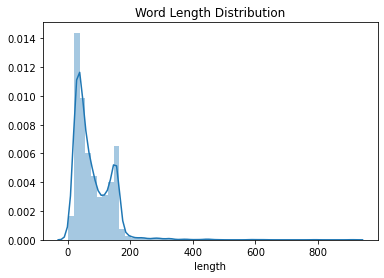

In [5]:
sns.distplot(sms["length"], kde=True)
plt.title('Word Length Distribution')
plt.show()

### Text preprocessing

In [6]:
sms['tokenized'] = sms['msg'].apply(word_tokenize)
sms

,label,msg,length,tokenized
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,ham,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,..."
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,"[This, is, the, 2nd, time, we, have, tried, 2,..."
5568,ham,Will ü b going to esplanade fr home?,36,"[Will, ü, b, going, to, esplanade, fr, home, ?]"
5569,ham,"Pity, * was in mood for that. So...any other s...",57,"[Pity, ,, *, was, in, mood, for, that, ., So, ..."
5570,ham,The guy did some bitching but I acted like i'd...,125,"[The, guy, did, some, bitching, but, I, acted,..."


In [7]:
sms['lower'] = sms['tokenized'].apply(lambda x: [word.lower() for word in x])
sms['no_punc'] = sms['lower'].apply(lambda x: [word for word in x if word not in string.punctuation])
sms[['no_punc']]

,no_punc
0,"[go, until, jurong, point, crazy, .., availabl..."
1,"[ok, lar, ..., joking, wif, u, oni, ...]"
2,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,"[u, dun, say, so, early, hor, ..., u, c, alrea..."
4,"[nah, i, do, n't, think, he, goes, to, usf, he..."
...,...
5567,"[this, is, the, 2nd, time, we, have, tried, 2,..."
5568,"[will, ü, b, going, to, esplanade, fr, home]"
5569,"[pity, was, in, mood, for, that, so, ..., any,..."
5570,"[the, guy, did, some, bitching, but, i, acted,..."


In [8]:
sms['stopwords_removed'] = sms['no_punc'].apply(lambda x: [word for word in x if word not in stopwords.words('english')])
sms

,label,msg,length,tokenized,lower,no_punc,stopwords_removed
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail...","[go, until, jurong, point, ,, crazy, .., avail...","[go, until, jurong, point, crazy, .., availabl...","[go, jurong, point, crazy, .., available, bugi..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]","[ok, lar, ..., joking, wif, u, oni, ...]","[ok, lar, ..., joking, wif, u, oni, ...]","[ok, lar, ..., joking, wif, u, oni, ...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...","[u, dun, say, so, early, hor, ..., u, c, alrea...","[u, dun, say, so, early, hor, ..., u, c, alrea...","[u, dun, say, early, hor, ..., u, c, already, ..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...","[nah, i, do, n't, think, he, goes, to, usf, ,,...","[nah, i, do, n't, think, he, goes, to, usf, he...","[nah, n't, think, goes, usf, lives, around, th..."
...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,"[This, is, the, 2nd, time, we, have, tried, 2,...","[this, is, the, 2nd, time, we, have, tried, 2,...","[this, is, the, 2nd, time, we, have, tried, 2,...","[2nd, time, tried, 2, contact, u., u, £750, po..."
5568,ham,Will ü b going to esplanade fr home?,36,"[Will, ü, b, going, to, esplanade, fr, home, ?]","[will, ü, b, going, to, esplanade, fr, home, ?]","[will, ü, b, going, to, esplanade, fr, home]","[ü, b, going, esplanade, fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other s...",57,"[Pity, ,, *, was, in, mood, for, that, ., So, ...","[pity, ,, *, was, in, mood, for, that, ., so, ...","[pity, was, in, mood, for, that, so, ..., any,...","[pity, mood, ..., suggestions]"
5570,ham,The guy did some bitching but I acted like i'd...,125,"[The, guy, did, some, bitching, but, I, acted,...","[the, guy, did, some, bitching, but, i, acted,...","[the, guy, did, some, bitching, but, i, acted,...","[guy, bitching, acted, like, 'd, interested, b..."


In [9]:
# we have to apply parts of speech tags; in other words, determine the part of speech for each word.
sms['pos_tags'] = sms['stopwords_removed'].apply(nltk.tag.pos_tag)

In [13]:
sms[['pos_tags']]

,pos_tags
0,"[(go, VB), (jurong, JJ), (point, NN), (crazy, ..."
1,"[(ok, JJ), (lar, NN), (..., :), (joking, VBG),..."
2,"[(free, JJ), (entry, NN), (2, CD), (wkly, JJ),..."
3,"[(u, JJ), (dun, NNS), (say, VBP), (early, JJ),..."
4,"[(nah, JJ), (n't, RB), (think, VB), (goes, VBZ..."
...,...
5567,"[(2nd, CD), (time, NN), (tried, VBD), (2, CD),..."
5568,"[(ü, NN), (b, NN), (going, VBG), (esplanade, J..."
5569,"[(pity, NN), (mood, NN), (..., :), (suggestion..."
5570,"[(guy, NN), (bitching, VBG), (acted, VBN), (li..."


In [10]:
# NLTK’s lemmatizer requires POS tags to be converted to wordnet’s format. We’ll write a function that makes the conversion.
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
sms['wordnet_pos'] = sms['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

In [11]:
# We may now call WordNetLemmatizer on the POS tagged data. The lemmatizer function requires two parameters, the word, and its tag, in wordnet form.
wnl = WordNetLemmatizer()
sms['lemmatized'] = sms['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])

In [12]:
sms[['lemmatized']]

,lemmatized
0,"[go, jurong, point, crazy, .., available, bugi..."
1,"[ok, lar, ..., joke, wif, u, oni, ...]"
2,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,"[u, dun, say, early, hor, ..., u, c, already, ..."
4,"[nah, n't, think, go, usf, life, around, though]"
...,...
5567,"[2nd, time, try, 2, contact, u., u, £750, poun..."
5568,"[ü, b, go, esplanade, fr, home]"
5569,"[pity, mood, ..., suggestion]"
5570,"[guy, bitch, act, like, 'd, interested, buying..."
